In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import seaborn as sns
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

lifeexp = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

In [13]:
lifeexp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

In [4]:
lifeexp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [67]:
lifeexp.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


In [6]:
lifeexp.isnull().sum()*100/lifeexp.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

After examining the data for missing values and correlations we see a number of insights. The top 5 most correlated values are schooling, income composition of resources, adult mortality, BMI and HIV/AIDS. All of these have a relatively low percentage of missing values which is good. The variables with the highest amount of missing variables are population, hepatitis B, and GDP. Since the data set is organized by country and then year, I will fill in the missing values using the interpolation method. After doing this we have no more missing values as seen below. 

In [133]:
#Remove whitespace from column headers and capitalize
lifeexp.columns = lifeexp.columns.str.strip()
lifeexp.columns = lifeexp.columns.str.upper()

lifeexp_cols = lifeexp.columns.tolist()
print(lifeexp_cols)

['COUNTRY', 'YEAR', 'STATUS', 'LIFE EXPECTANCY', 'ADULT MORTALITY', 'INFANT DEATHS', 'ALCOHOL', 'PERCENTAGE EXPENDITURE', 'HEPATITIS B', 'MEASLES', 'BMI', 'UNDER-FIVE DEATHS', 'POLIO', 'TOTAL EXPENDITURE', 'DIPHTHERIA', 'HIV/AIDS', 'GDP', 'POPULATION', 'THINNESS  1-19 YEARS', 'THINNESS 5-9 YEARS', 'INCOME COMPOSITION OF RESOURCES', 'SCHOOLING']


In [134]:
#Fill in missing values with interpolation
lifeexp2 = lifeexp.copy() 

for col in lifeexp_cols:
    lifeexp2.loc[:, col] = lifeexp2.loc[:, col].interpolate(limit_direction = 'both')
    
print(lifeexp2.isnull().sum()*100/lifeexp2.isnull().count())

COUNTRY                            0.0
YEAR                               0.0
STATUS                             0.0
LIFE EXPECTANCY                    0.0
ADULT MORTALITY                    0.0
INFANT DEATHS                      0.0
ALCOHOL                            0.0
PERCENTAGE EXPENDITURE             0.0
HEPATITIS B                        0.0
MEASLES                            0.0
BMI                                0.0
UNDER-FIVE DEATHS                  0.0
POLIO                              0.0
TOTAL EXPENDITURE                  0.0
DIPHTHERIA                         0.0
HIV/AIDS                           0.0
GDP                                0.0
POPULATION                         0.0
THINNESS  1-19 YEARS               0.0
THINNESS 5-9 YEARS                 0.0
INCOME COMPOSITION OF RESOURCES    0.0
SCHOOLING                          0.0
dtype: float64


### Search for Outliers

In [68]:
lifeexp2.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.00000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.214874,164.744554,30.303948,4.548919,738.251295,78.536419,2419.592240,38.29869,42.035739,82.474643,5.940955,82.246086,1.742103,7432.027910,1.229209e+07,4.882301,4.920439,0.634458,12.076804
std,4.613841,9.510819,124.226596,117.926501,3.994854,1987.914858,25.177963,11467.272489,19.99140,160.445548,23.420689,2.445751,23.705664,5.077785,13410.150286,5.471908e+07,4.433359,4.532488,0.209574,3.342316
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.00000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.902500,4.685343,71.000000,0.000000,19.32500,0.000000,78.000000,4.312500,78.000000,0.100000,553.618620,2.536025e+05,1.600000,1.600000,0.500000,10.200000
50%,2008.000000,72.000000,144.000000,3.000000,3.697500,64.912906,89.000000,17.000000,43.25000,4.000000,93.000000,5.760000,93.000000,0.100000,2192.681084,1.576319e+06,3.400000,3.400000,0.684000,12.400000
75%,2012.000000,75.600000,228.000000,22.000000,7.550000,441.534144,96.000000,360.250000,56.10000,28.000000,97.000000,7.440000,97.000000,0.800000,7183.381694,8.215738e+06,7.200000,7.300000,0.791107,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.30000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Next, I used the describe function to examine the dataset for outliers. After looking over the data there appears to be a number of variables that appear to have some outliers. We'll look at boxplots to verify. 

In [175]:
#Create a dictionary for boxplotting
list1 = lifeexp_cols[4:]
list2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
lifeexp_dict = dict( zip( list1, list2))
print(lifeexp_dict)

{'ADULT MORTALITY': 1, 'INFANT DEATHS': 2, 'ALCOHOL': 3, 'PERCENTAGE EXPENDITURE': 4, 'HEPATITIS B': 5, 'MEASLES': 6, 'BMI': 7, 'UNDER-FIVE DEATHS': 8, 'POLIO': 9, 'TOTAL EXPENDITURE': 10, 'DIPHTHERIA': 11, 'HIV/AIDS': 12, 'GDP': 13, 'POPULATION': 14, 'THINNESS  1-19 YEARS': 15, 'THINNESS 5-9 YEARS': 16, 'INCOME COMPOSITION OF RESOURCES': 17, 'SCHOOLING': 18}


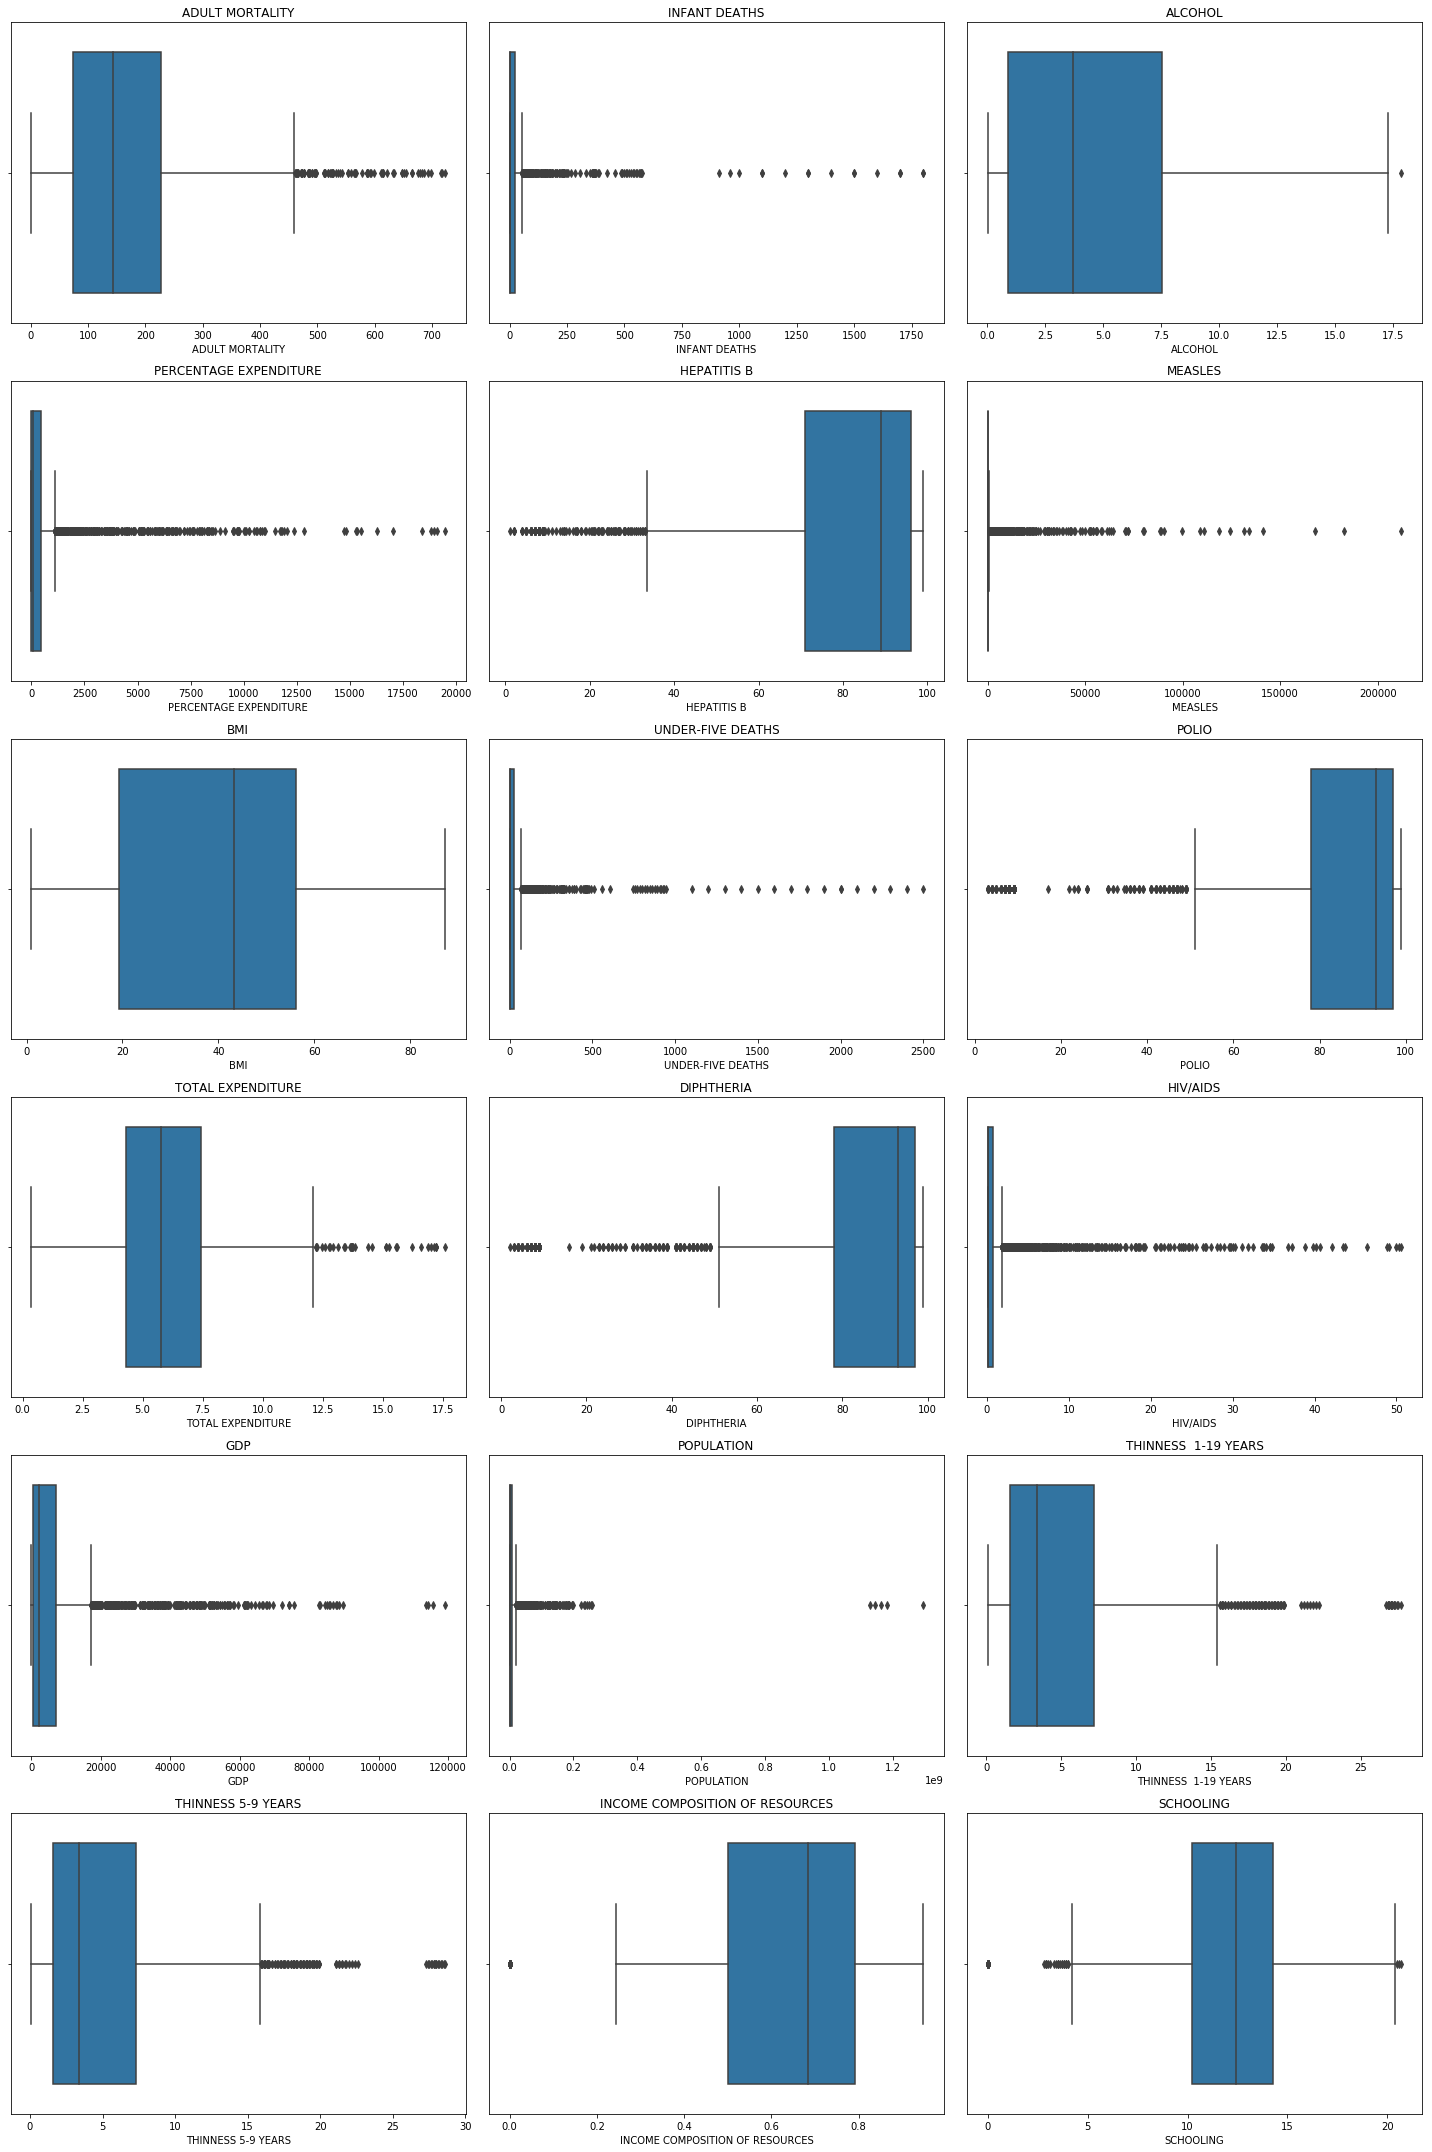

In [176]:
plt.figure(figsize=(20,30))

for variable, i in lifeexp_dict.items():
                     plt.subplot(6, 3, i)
                     sns.boxplot(lifeexp2[variable])
                     plt.title(variable)

plt.tight_layout()
plt.show()

Instead of dropping any values, I have decided to perform winsorizations on the variables with outliers above. I've created new columns for the winsorized variables. Now that missing values have been fill in and some of the outliers have been addressed, I want to again look at the correlations with life expectancy. The most highly correlated variable is now winsorized_HIV/AIDS, followed by schooling, adult mortality, income composition of resources, winsorized_under-five deaths, winsorized_infant deaths and BMI. Both the infant deaths and under-five deaths had a large increase in correlation following winsorization.  

In [152]:
#Create a cleaned up version of the data frame
le_clean = lifeexp2.copy()

#left-tailed winsorizaions
le_clean['WINSORIZED_HEPATITIS B'] = winsorize(lifeexp2['HEPATITIS B'], (0.10, 0))
le_clean['WINSORIZED_POLIO'] = winsorize(lifeexp2['POLIO'], (0.10, 0))
le_clean['WINSORIZED_DIPHTHERIA'] = winsorize(lifeexp2['DIPHTHERIA'], (0.10, 0))

#right-tailed winsorizations
le_clean['WINSORIZED_ADULT MORTALITY'] = winsorize(lifeexp2['ADULT MORTALITY'], (0, 0.10))
le_clean['WINSORIZED_INFANT DEATHS'] = winsorize(lifeexp2['INFANT DEATHS'], (0, 0.10))
le_clean['WINSORIZED_PERCENTAGE EXPENDITURE'] = winsorize(lifeexp2['PERCENTAGE EXPENDITURE'], (0, 0.15))
le_clean['WINSORIZED_MEASLES'] = winsorize(lifeexp2['MEASLES'], (0, 0.20))
le_clean['WINSORIZED_UNDER-FIVE DEATHS'] = winsorize(lifeexp2['UNDER-FIVE DEATHS'], (0, 0.15))
le_clean['WINSORIZED_TOTAL EXPENDITURE'] = winsorize(lifeexp2['TOTAL EXPENDITURE'], (0, 0.10))
le_clean['WINSORIZED_HIV/AIDS'] = winsorize(lifeexp2['HIV/AIDS'], (0, 0.15))
le_clean['WINSORIZED_GDP'] = winsorize(lifeexp2['GDP'], (0, 0.15))
le_clean['WINSORIZED_POPULATION'] = winsorize(lifeexp2['POPULATION'], (0, 0.15))
le_clean['WINSORIZED_THINNESS 1-19 YEARS'] = winsorize(lifeexp2['THINNESS  1-19 YEARS'], (0, 0.10))
le_clean['WINSORIZED_THINNESS 5-9 YEARS'] = winsorize(lifeexp2['THINNESS 5-9 YEARS'], (0, 0.10))

le_clean.drop(columns = ['ADULT MORTALITY', 'INFANT DEATHS', 'PERCENTAGE EXPENDITURE', 'HEPATITIS B', 'MEASLES', 
                         'UNDER-FIVE DEATHS', 'POLIO', 'TOTAL EXPENDITURE', 'DIPHTHERIA', 'HIV/AIDS', 'GDP', 'POPULATION', 
                         'THINNESS  1-19 YEARS', 'THINNESS 5-9 YEARS'], inplace = True)

le_clean.corr()

,YEAR,LIFE EXPECTANCY,ALCOHOL,BMI,INCOME COMPOSITION OF RESOURCES,SCHOOLING,WINSORIZED_HEPATITIS B,WINSORIZED_POLIO,WINSORIZED_DIPHTHERIA,WINSORIZED_ADULT MORTALITY,WINSORIZED_INFANT DEATHS,WINSORIZED_PERCENTAGE EXPENDITURE,WINSORIZED_MEASLES,WINSORIZED_UNDER-FIVE DEATHS,WINSORIZED_TOTAL EXPENDITURE,WINSORIZED_HIV/AIDS,WINSORIZED_GDP,WINSORIZED_POPULATION,WINSORIZED_THINNESS 1-19 YEARS,WINSORIZED_THINNESS 5-9 YEARS
YEAR,1.000000,0.168309,-0.064487,0.100417,0.223818,0.185780,0.173897,0.118496,0.148799,-0.052713,-0.048067,0.034195,-0.115141,-0.052350,0.064023,-0.093121,0.096812,0.021871,-0.034685,-0.033263
LIFE EXPECTANCY,0.168309,1.000000,0.400068,0.556433,0.690071,0.703409,0.290080,0.569382,0.569790,-0.657417,-0.560574,0.487818,-0.336149,-0.608112,0.218671,-0.789407,0.486337,0.001772,-0.588636,-0.590461
ALCOHOL,-0.064487,0.400068,1.000000,0.319618,0.442169,0.507064,0.107213,0.272984,0.269493,-0.218600,-0.325668,0.382778,-0.198603,-0.345772,0.302133,-0.177226,0.435612,0.003090,-0.461839,-0.453388
BMI,0.100417,0.556433,0.319618,1.000000,0.461457,0.488210,0.200854,0.341747,0.337156,-0.396082,-0.447790,0.331522,-0.318103,-0.470341,0.226597,-0.467536,0.332950,-0.022859,-0.573348,-0.584047
INCOME COMPOSITION OF RESOURCES,0.223818,0.690071,0.442169,0.461457,1.000000,0.803152,0.239498,0.453160,0.445634,-0.457360,-0.366754,0.452059,-0.196584,-0.409917,0.161316,-0.490938,0.521258,0.041089,-0.465586,-0.459757
SCHOOLING,0.185780,0.703409,0.507064,0.488210,0.803152,1.000000,0.249701,0.485847,0.473419,-0.460612,-0.460089,0.478152,-0.286508,-0.503193,0.236013,-0.509750,0.516009,-0.013131,-0.511093,-0.507921
WINSORIZED_HEPATITIS B,0.173897,0.290080,0.107213,0.200854,0.239498,0.249701,1.000000,0.560085,0.601309,-0.195836,-0.261685,0.092612,-0.232466,-0.269316,0.123112,-0.270371,0.129312,-0.005741,-0.144738,-0.155614
WINSORIZED_POLIO,0.118496,0.569382,0.272984,0.341747,0.453160,0.485847,0.560085,1.000000,0.851060,-0.357190,-0.420697,0.270752,-0.315634,-0.443480,0.170410,-0.466206,0.310370,-0.005467,-0.310474,-0.310046
WINSORIZED_DIPHTHERIA,0.148799,0.569790,0.269493,0.337156,0.445634,0.473419,0.601309,0.851060,1.000000,-0.353662,-0.407118,0.267883,-0.307693,-0.427979,0.174800,-0.464459,0.283674,-0.000961,-0.316690,-0.312255
WINSORIZED_ADULT MORTALITY,-0.052713,-0.657417,-0.218600,-0.396082,-0.457360,-0.460612,-0.195836,-0.357190,-0.353662,1.000000,0.371233,-0.336492,0.208193,0.400106,-0.151809,0.551608,-0.324824,-0.000456,0.405366,0.417060


{'ALCOHOL': 1, 'BMI': 2, 'INCOME COMPOSITION OF RESOURCES': 3, 'SCHOOLING': 4, 'WINSORIZED_HEPATITIS B': 5, 'WINSORIZED_POLIO': 6, 'WINSORIZED_DIPHTHERIA': 7, 'WINSORIZED_ADULT MORTALITY': 8, 'WINSORIZED_INFANT DEATHS': 9, 'WINSORIZED_PERCENTAGE EXPENDITURE': 10, 'WINSORIZED_MEASLES': 11, 'WINSORIZED_UNDER-FIVE DEATHS': 12, 'WINSORIZED_TOTAL EXPENDITURE': 13, 'WINSORIZED_HIV/AIDS': 14, 'WINSORIZED_GDP': 15, 'WINSORIZED_POPULATION': 16, 'WINSORIZED_THINNESS 1-19 YEARS': 17, 'WINSORIZED_THINNESS 5-9 YEARS': 18}


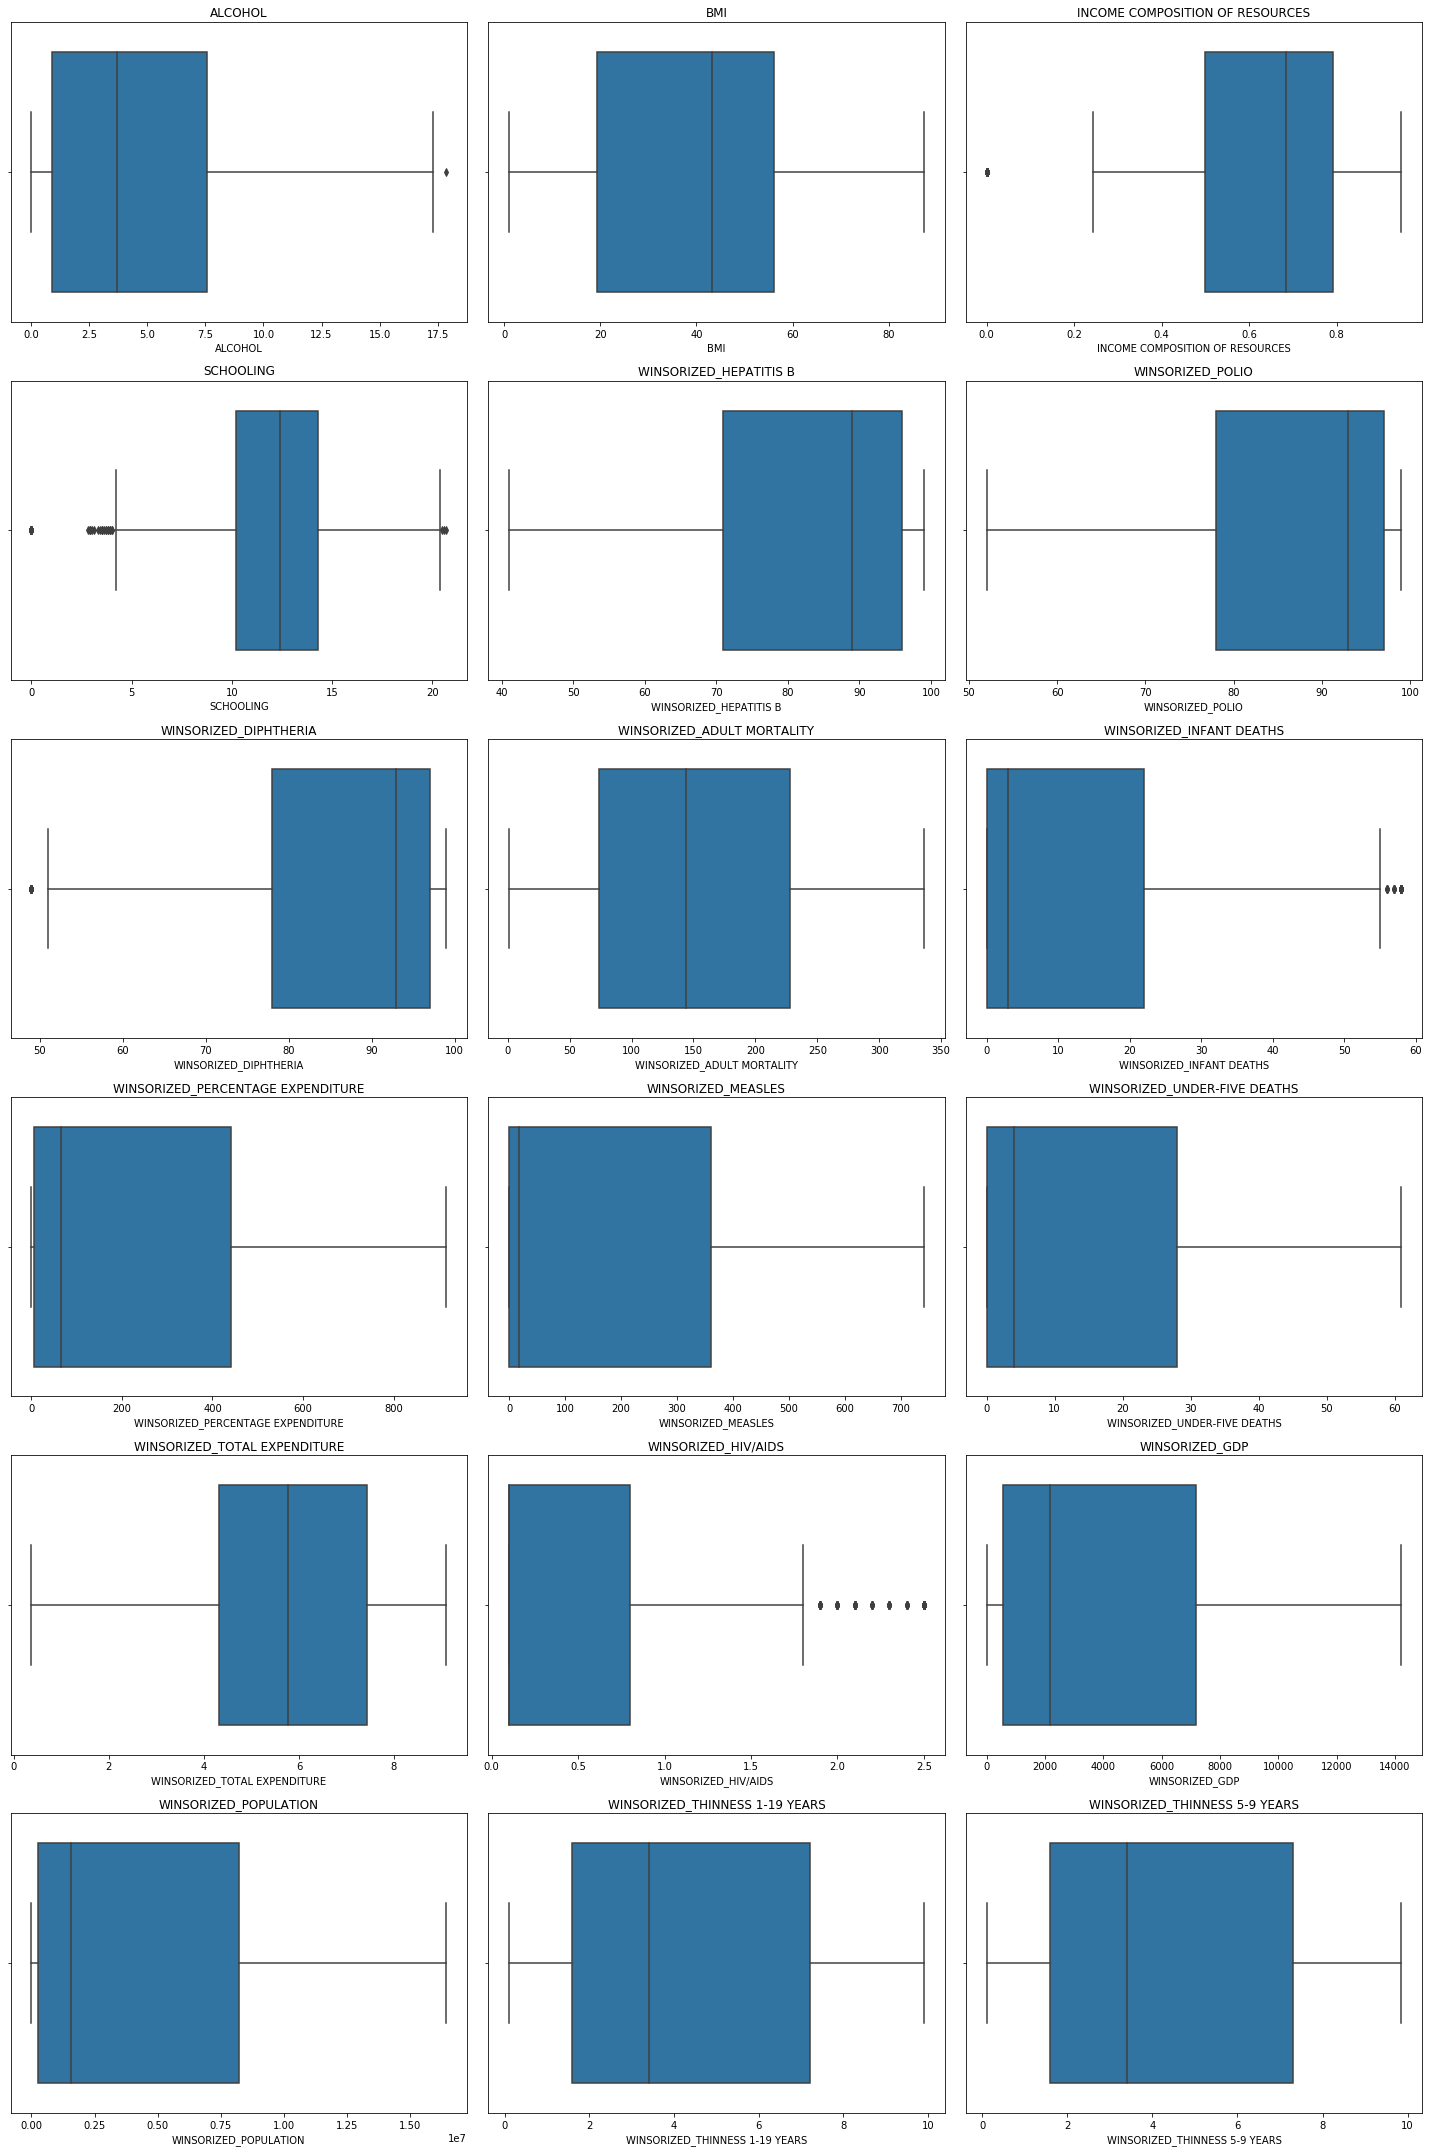

In [173]:
#Verify outliers have been removed
le_clean_cols = le_clean.columns.tolist()
list1 = le_clean_cols[4:]
list2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
clean_dict = dict( zip( list1, list2))
print(clean_dict)

plt.figure(figsize=(20,30))

for variable, i in clean_dict.items():
                     plt.subplot(6, 3, i)
                     sns.boxplot(le_clean[variable])
                     plt.title(variable)

plt.tight_layout()
plt.show()

Re-examining the boxplots for the winsorized values we see that most of the outliers have been eliminated.

### Exploratory Data Analysis

### Univariate and Multivariate Analysis

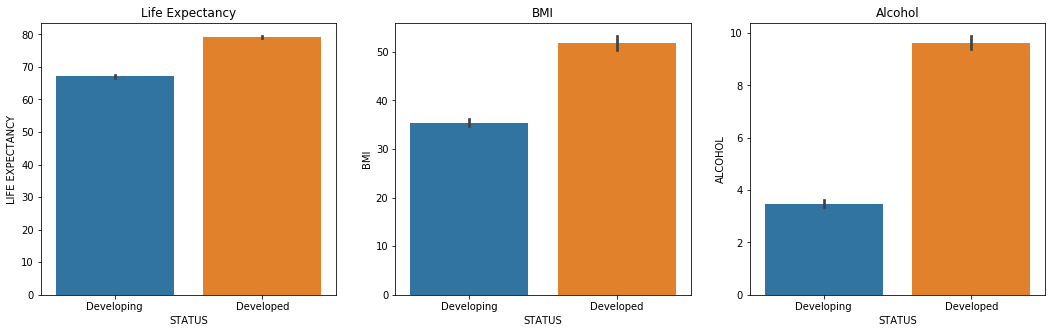

In [156]:
#life expectancy & health comparisons
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(le_clean['STATUS'], le_clean['LIFE EXPECTANCY'])
plt.title("Life Expectancy")

plt.subplot(1,3,2)
sns.barplot(le_clean['STATUS'], le_clean['BMI'])
plt.title("BMI")

plt.subplot(1,3,3)
sns.barplot(le_clean['STATUS'], le_clean['ALCOHOL'])
plt.title("Alcohol")

plt.show()

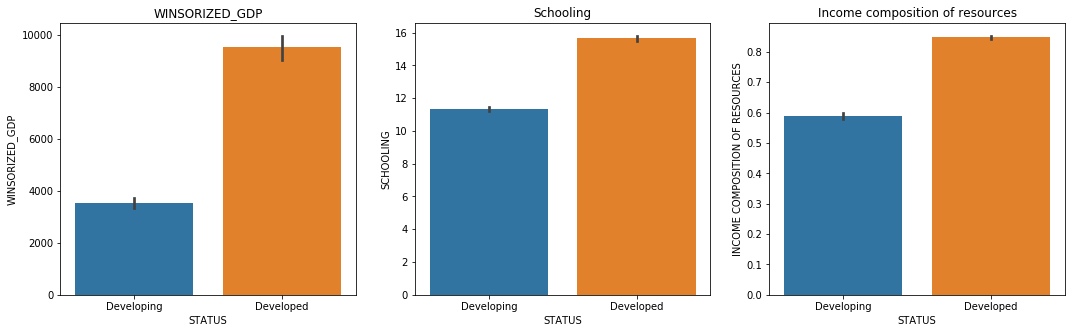

In [158]:
#economic & schooling comparisons
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(le_clean['STATUS'], le_clean['WINSORIZED_GDP'])
plt.title("Winsorized GDP")

plt.subplot(1,3,2)
sns.barplot(le_clean['STATUS'], le_clean['SCHOOLING'])
plt.title("Schooling")

plt.subplot(1,3,3)
sns.barplot(le_clean['STATUS'], le_clean['INCOME COMPOSITION OF RESOURCES'])
plt.title("Income Composition of Resources")

plt.show()

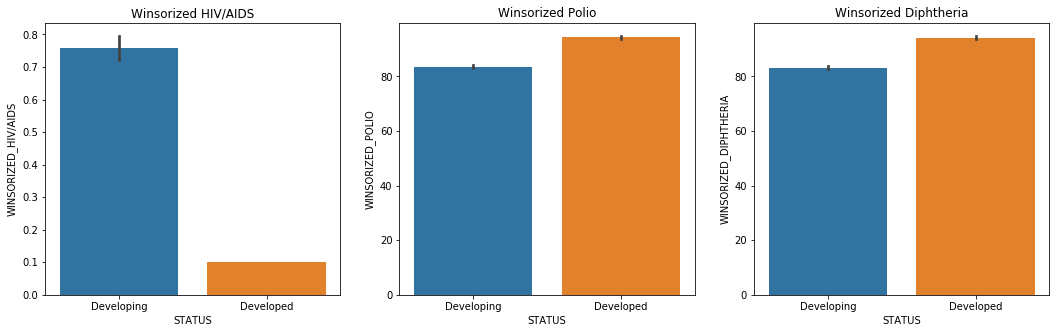

In [160]:
#vaccination & disease comparisons
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(le_clean['STATUS'], le_clean['WINSORIZED_HIV/AIDS'])
plt.title("Winsorized HIV/AIDS")

plt.subplot(1,3,2)
sns.barplot(le_clean['STATUS'], le_clean['WINSORIZED_POLIO'])
plt.title("Winsorized Polio")

plt.subplot(1,3,3)
sns.barplot(le_clean['STATUS'], le_clean['WINSORIZED_DIPHTHERIA'])
plt.title("Winsorized Diphtheria")

plt.show()

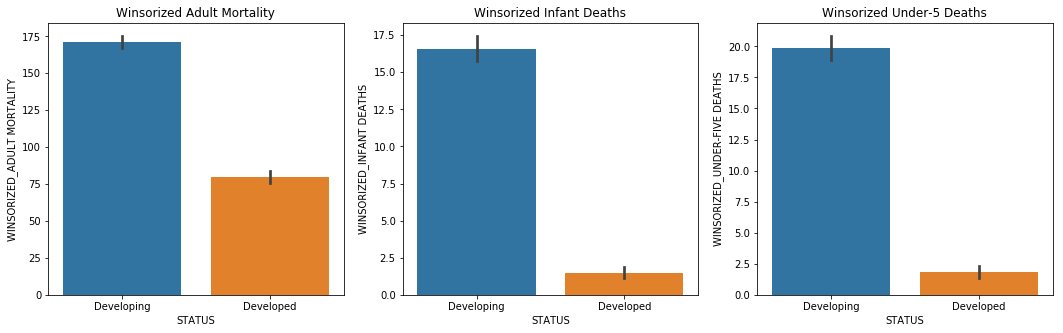

In [162]:
#early death & mortality comparisons 
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(le_clean['STATUS'], le_clean['WINSORIZED_ADULT MORTALITY'])
plt.title("Winsorized Adult Mortality")

plt.subplot(1,3,2)
sns.barplot(le_clean['STATUS'], le_clean['WINSORIZED_INFANT DEATHS'])
plt.title("Winsorized Infant Deaths")

plt.subplot(1,3,3)
sns.barplot(le_clean['STATUS'], le_clean['WINSORIZED_UNDER-FIVE DEATHS'])
plt.title("Winsorized Under-5 Deaths")

plt.show()

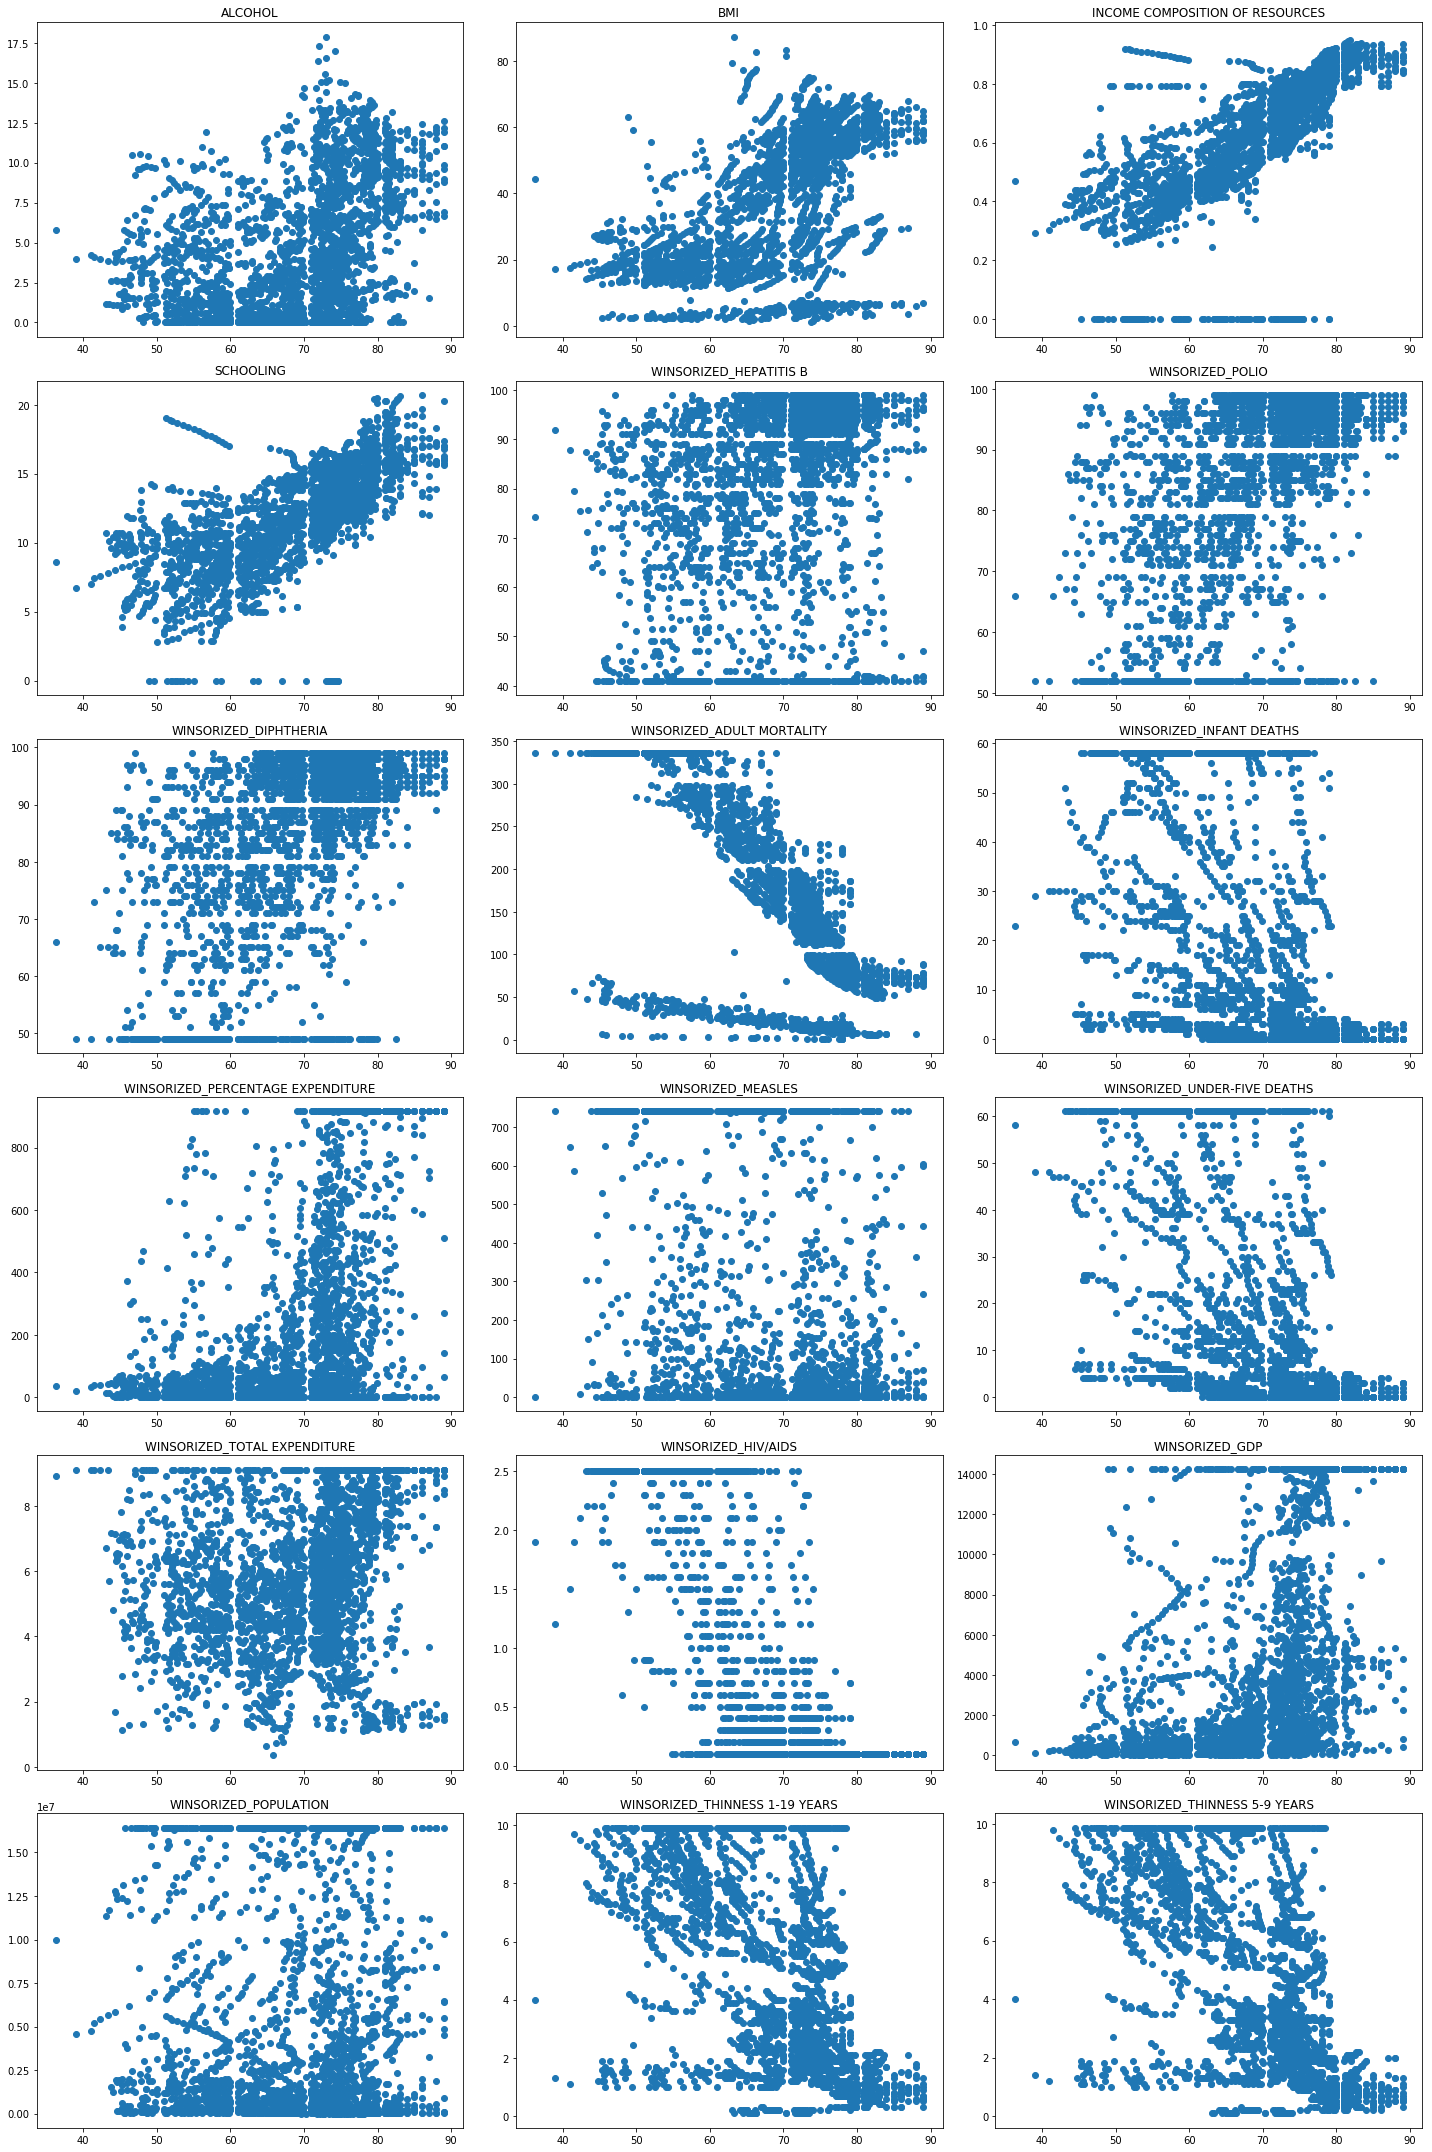

In [177]:
plt.figure(figsize=(20,30))

for variable, i in clean_dict.items():
                     plt.subplot(6, 3, i)
                     plt.scatter(x = le_clean['LIFE EXPECTANCY'], y = le_clean[variable])
                     plt.title(variable)

plt.tight_layout()
plt.show()

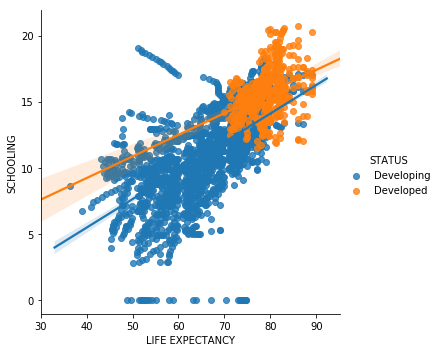

In [169]:
sns.lmplot(x = 'LIFE EXPECTANCY', y = 'SCHOOLING', hue = 'STATUS', data = le_clean)

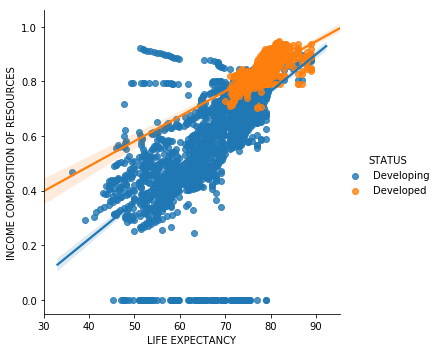

In [164]:
sns.lmplot(x = 'LIFE EXPECTANCY', y = 'INCOME COMPOSITION OF RESOURCES', hue = 'STATUS', data = le_clean)

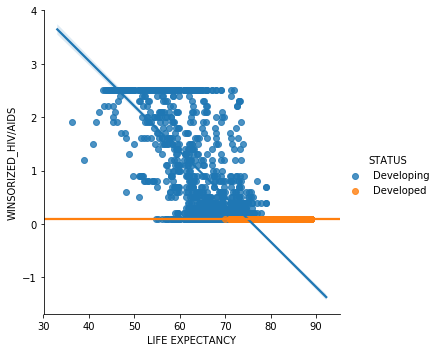

In [163]:
sns.lmplot(x = 'LIFE EXPECTANCY', y = 'WINSORIZED_HIV/AIDS', hue = 'STATUS', data = le_clean)

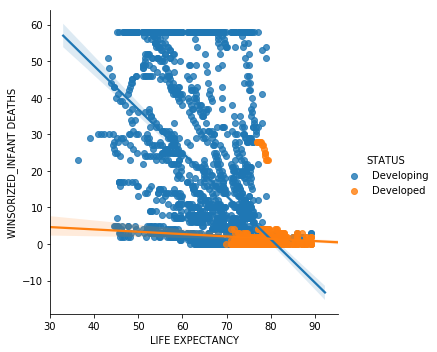

In [165]:
sns.lmplot(x = 'LIFE EXPECTANCY', y = 'WINSORIZED_INFANT DEATHS', hue = 'STATUS', data = le_clean)

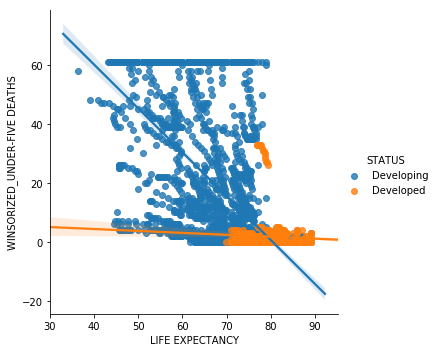

In [167]:
sns.lmplot(x = 'LIFE EXPECTANCY', y = 'WINSORIZED_UNDER-FIVE DEATHS', hue = 'STATUS', data = le_clean)

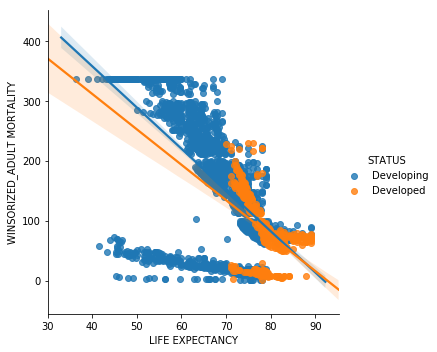

In [166]:
sns.lmplot(x = 'LIFE EXPECTANCY', y = 'WINSORIZED_ADULT MORTALITY', hue = 'STATUS', data = le_clean)

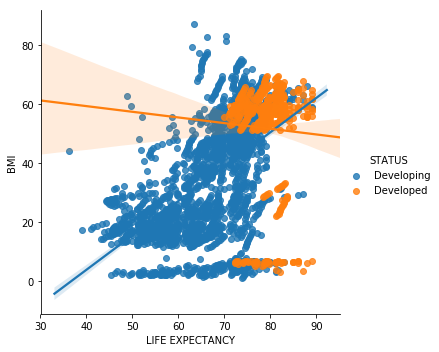

In [168]:
sns.lmplot(x = 'LIFE EXPECTANCY', y = 'BMI', hue = 'STATUS', data = le_clean)

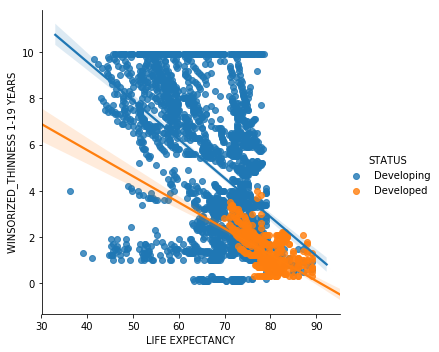

In [180]:
sns.lmplot(x = 'LIFE EXPECTANCY', y = 'WINSORIZED_THINNESS 1-19 YEARS', hue = 'STATUS', data = le_clean)

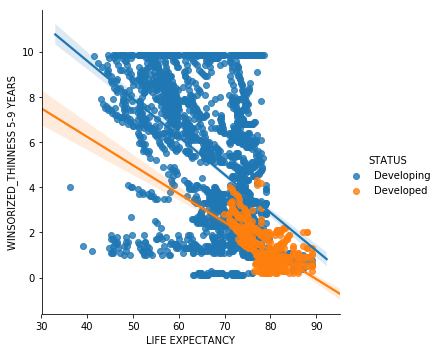

In [181]:
sns.lmplot(x = 'LIFE EXPECTANCY', y = 'WINSORIZED_THINNESS 5-9 YEARS', hue = 'STATUS', data = le_clean)

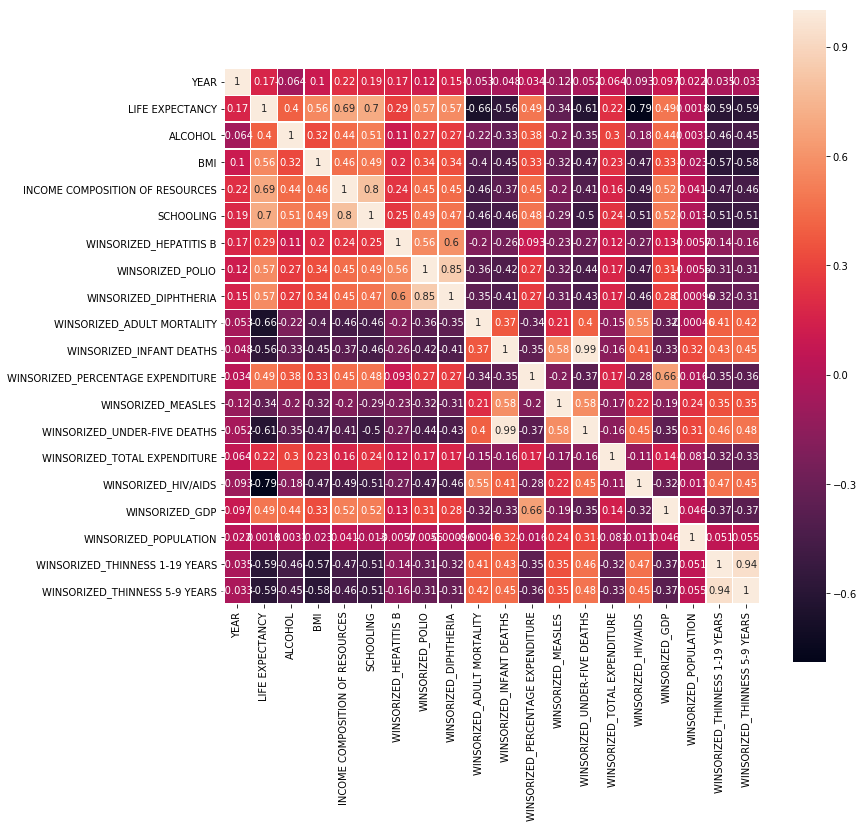

In [183]:
cor_map = le_clean.corr()

fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(cor_map, square=True, annot=True, linewidths=.5, ax = ax)

After looking over all the data we can now pick which features we want to use for the modeling phase. Two variables that both show a strong positive correlation with life expectancy are schooling and income composition of resources. They are also both correlated to each other so it would be best if only one was chosen. We will choose schooling. The winsorized adult mortality, HIV/AIDS, under-five deaths and thinness 1-19 years variables all show a high negative correlation to life expectancy and would all be good choices. Finally, the status variable also seems like a logical choice. 

### Features Engineering

In [207]:
le_model = le_clean[['LIFE EXPECTANCY', 'STATUS', 'SCHOOLING', 'WINSORIZED_ADULT MORTALITY', 'WINSORIZED_HIV/AIDS', 
                     'WINSORIZED_UNDER-FIVE DEATHS', 'WINSORIZED_THINNESS 1-19 YEARS']]
le_model = pd.concat([le_model, pd.get_dummies(le_model["STATUS"])], axis=1)
le_model.head()

,LIFE EXPECTANCY,STATUS,SCHOOLING,WINSORIZED_ADULT MORTALITY,WINSORIZED_HIV/AIDS,WINSORIZED_UNDER-FIVE DEATHS,WINSORIZED_THINNESS 1-19 YEARS,Developed,Developing
0,65.0,Developing,10.1,263.0,0.1,61,9.9,0,1
1,59.9,Developing,10.0,271.0,0.1,61,9.9,0,1
2,59.9,Developing,9.9,268.0,0.1,61,9.9,0,1
3,59.5,Developing,9.8,272.0,0.1,61,9.9,0,1
4,59.2,Developing,9.5,275.0,0.1,61,9.9,0,1


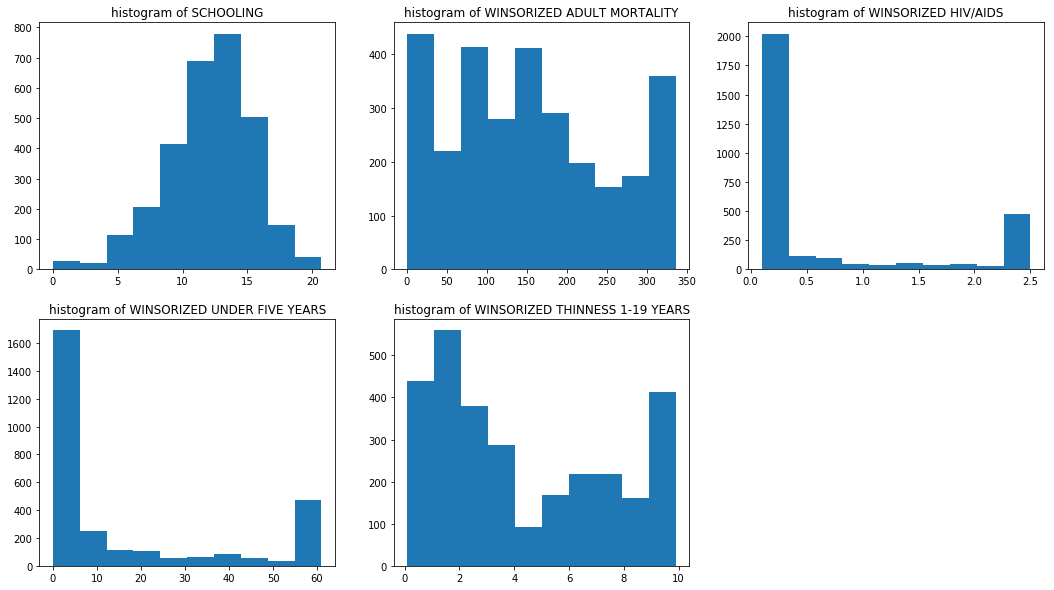

In [187]:
#check variables for normality
plt.figure(figsize=(18,10))

plt.subplot(2, 3, 1)
plt.hist(le_model['SCHOOLING'])
plt.title("histogram of SCHOOLING")

plt.subplot(2, 3, 2)
plt.hist(le_model['WINSORIZED_ADULT MORTALITY'])
plt.title("histogram of WINSORIZED ADULT MORTALITY")

plt.subplot(2, 3, 3)
plt.hist(le_model['WINSORIZED_HIV/AIDS'])
plt.title("histogram of WINSORIZED HIV/AIDS")

plt.subplot(2, 3, 4)
plt.hist(le_model['WINSORIZED_UNDER-FIVE DEATHS'])
plt.title("histogram of WINSORIZED UNDER FIVE DEATHS")

plt.subplot(2, 3, 5)
plt.hist(le_model['WINSORIZED_THINNESS 1-19 YEARS'])
plt.title("histogram of WINSORIZED THINNESS 1-19 YEARS")
plt.show()

In [215]:
#attempt to create normal distributions
from scipy.stats import boxcox

schooling_boxcox,_ = boxcox(le_model[le_model["SCHOOLING"] > 0]["SCHOOLING"])
adult_mortality_boxcox,_ = boxcox(le_model["WINSORIZED_ADULT MORTALITY"])
hiv_aids_boxcox,_ = boxcox(le_model["WINSORIZED_HIV/AIDS"])
under_five_deaths_boxcox,_ = boxcox(le_model[le_model["WINSORIZED_UNDER-FIVE DEATHS"] > 0]["WINSORIZED_UNDER-FIVE DEATHS"])
thinness_boxcox,_ = boxcox(le_model["WINSORIZED_THINNESS 1-19 YEARS"])

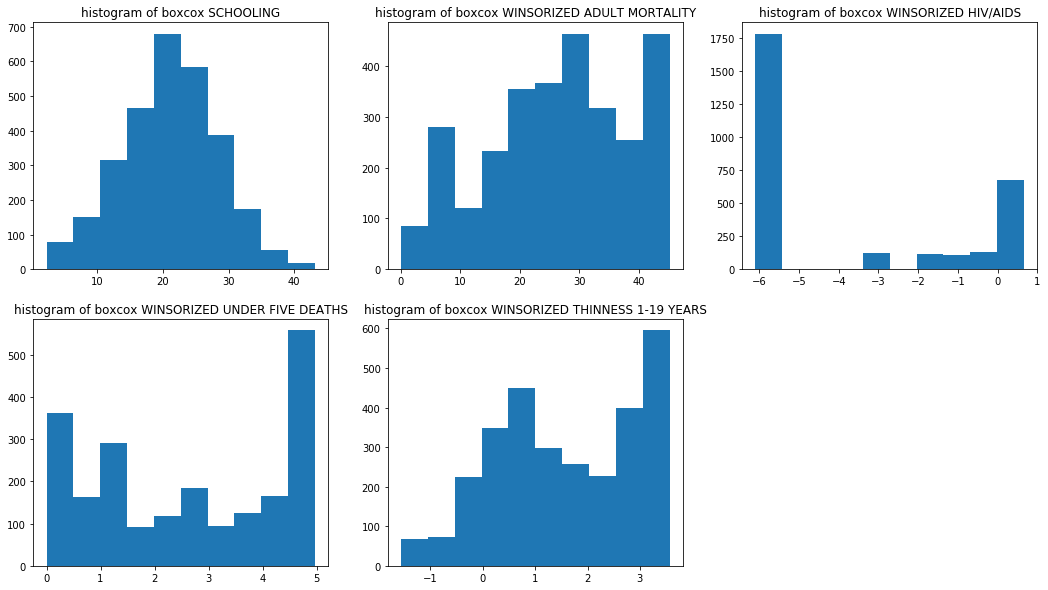

In [193]:
#check box cox variables for normality
plt.figure(figsize=(18,10))

plt.subplot(2, 3, 1)
plt.hist(schooling_boxcox)
plt.title("histogram of boxcox SCHOOLING")

plt.subplot(2, 3, 2)
plt.hist(adult_mortality_boxcox)
plt.title("histogram of boxcox WINSORIZED ADULT MORTALITY")

plt.subplot(2, 3, 3)
plt.hist(hiv_aids_boxcox)
plt.title("histogram of boxcox WINSORIZED HIV/AIDS")

plt.subplot(2, 3, 4)
plt.hist(under_five_deaths_boxcox)
plt.title("histogram of boxcox WINSORIZED UNDER FIVE DEATHS")

plt.subplot(2, 3, 5)
plt.hist(thinness_boxcox)
plt.title("histogram of boxcox WINSORIZED THINNESS 1-19 YEARS")
plt.show()

In [197]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(schooling_boxcox)
norm_stats = normaltest(schooling_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(adult_mortality_boxcox)
norm_stats = normaltest(adult_mortality_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(hiv_aids_boxcox)
norm_stats = normaltest(hiv_aids_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(under_five_deaths_boxcox)
norm_stats = normaltest(under_five_deaths_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(thinness_boxcox)
norm_stats = normaltest(thinness_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3.829795654884586 and p value is 0.14735688764714838
Normality test statistics is 4.116342089034077 and p value is 0.12768729083365052
Jarque-Bera test statistics is 111.60222333186407 and p value is 0.0
Normality test statistics is 349.74434561806703 and p value is 1.1323490253215084e-76
Jarque-Bera test statistics is 452.5700507617548 and p value is 0.0
Normality test statistics is 21179.51941737425 and p value is 0.0
Jarque-Bera test statistics is 192.00066703987198 and p value is 0.0
Normality test statistics is 16335.189402068321 and p value is 0.0
Jarque-Bera test statistics is 154.56899119553626 and p value is 0.0
Normality test statistics is 1141.2063335255689 and p value is 1.5495062003261012e-248


The boxcox transformation did not produce normal distributions for all of the variables. 

In [223]:
#examine how are variables are performing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = le_model[["SCHOOLING", "WINSORIZED_ADULT MORTALITY", "WINSORIZED_HIV/AIDS", "WINSORIZED_UNDER-FIVE DEATHS", "WINSORIZED_THINNESS 1-19 YEARS"]]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
le_model["PCA_1"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by top component from Sklearn PCA.\n', 
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by top component from Sklearn PCA.
 [0.57858022]
